In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import  pandas as pd
import cv2
from PIL import Image
from tensorflow import keras
from keras import layers as tfl
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization

In [2]:
base_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/'
train_normal = os.listdir(os.path.join(base_dir, 'train/NORMAL') )
val_normal  = os.listdir(os.path.join(base_dir, 'val/NORMAL') )
test_normal  =  os.listdir(os.path.join(base_dir, 'test/NORMAL') )
print('Instances for Class Chest Xray: Train {}, Validation {} Test {}'.format(len(train_normal), len(val_normal), len(test_normal)))

FileNotFoundError: [WinError 3] Sistem belirtilen yolu bulamıyor: '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL'

In [3]:
base_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/'
train_pnu = os.listdir(os.path.join(base_dir, 'train/PNEUMONIA') )
val_pnu  = os.listdir(os.path.join(base_dir, 'val/PNEUMONIA') )
test_pnu  =  os.listdir(os.path.join(base_dir, 'test/PNEUMONIA') )
print('Instances for Class Chest PNEUMONIA Xray: Train {}, Validation {} Test {}'.format(len(train_pnu), len(val_pnu), len(test_pnu)))

Instances for Class Chest PNEUMONIA Xray: Train 3875, Validation 8 Test 390


In [4]:
train_normal[2]

'IM-0675-0001.jpeg'

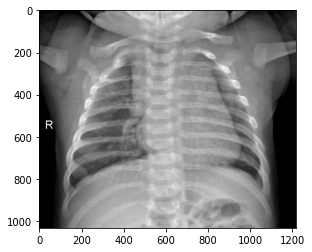

In [5]:

image = cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/'+train_normal[2])
plt.imshow(image)

In [6]:

trnormal_path = []
trnormal_labels = []

for i in train_normal:
    trnormal_labels.append("Normal")
    print(i)
    trnormal_path .append('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/'+i)
return trnormal_path, trnormal_labels

NORMAL2-IM-0771-0001.jpeg
NORMAL2-IM-1294-0001-0002.jpeg
IM-0675-0001.jpeg
NORMAL2-IM-1169-0001.jpeg
IM-0421-0001.jpeg
NORMAL2-IM-0531-0001.jpeg
NORMAL2-IM-0416-0001-0002.jpeg
NORMAL2-IM-0965-0001.jpeg
NORMAL2-IM-0627-0001.jpeg
NORMAL2-IM-0997-0001.jpeg
NORMAL2-IM-0757-0001.jpeg
IM-0629-0001-0002.jpeg
IM-0588-0001.jpeg
IM-0713-0001.jpeg
NORMAL2-IM-0696-0001.jpeg
NORMAL2-IM-0808-0001.jpeg
NORMAL2-IM-1126-0001.jpeg
IM-0701-0001.jpeg
NORMAL2-IM-1046-0001.jpeg
IM-0304-0001.jpeg
NORMAL2-IM-0385-0001.jpeg
NORMAL2-IM-0908-0001.jpeg
NORMAL2-IM-1301-0001.jpeg
NORMAL2-IM-0428-0001.jpeg
NORMAL2-IM-1318-0001.jpeg
IM-0626-0001-0001.jpeg
NORMAL2-IM-0399-0001.jpeg
IM-0452-0001.jpeg
IM-0672-0001.jpeg
IM-0314-0001.jpeg
NORMAL2-IM-0578-0001.jpeg
NORMAL2-IM-1171-0001.jpeg
NORMAL2-IM-1401-0001.jpeg
IM-0313-0001.jpeg
IM-0461-0001.jpeg
IM-0578-0001.jpeg
IM-0613-0001.jpeg
IM-0320-0001.jpeg
IM-0624-0001-0002.jpeg
NORMAL2-IM-0460-0001.jpeg
NORMAL2-IM-0490-0001.jpeg
IM-0640-0001-0001.jpeg
IM-0678-0001.jpeg
IM-0

SyntaxError: 'return' outside function (723184221.py, line 8)

In [7]:
print(trnormal_path[2],"&",trnormal_labels[2])

/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0675-0001.jpeg & Normal


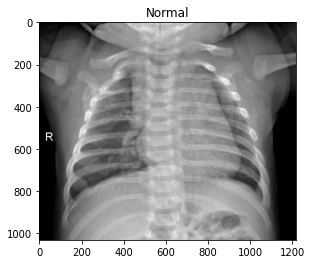

In [8]:
image = cv2.imread(trnormal_path[2])
plt.title(trnormal_labels[2])
plt.imshow(image)

In [9]:
trpneu_path = []
trpneu_labels = []

for i in train_pnu:
    trpneu_labels.append("Pneumonia")
    print(i)
    trpneu_path .append('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/'+i)
return trpneu_path, trpneu_labels

person1180_virus_2010.jpeg
person1230_virus_2081.jpeg
person1513_virus_2632.jpeg
person124_virus_238.jpeg
person746_virus_1369.jpeg
person588_bacteria_2422.jpeg
person466_virus_960.jpeg
person1590_bacteria_4175.jpeg
person399_bacteria_1805.jpeg
person59_bacteria_279.jpeg
person57_bacteria_270.jpeg
person600_bacteria_2456.jpeg
person1527_virus_2661.jpeg
person1418_bacteria_3636.jpeg
person622_bacteria_2494.jpeg
person1361_bacteria_3476.jpeg
person494_virus_1000.jpeg
person97_virus_180.jpeg
person1689_bacteria_4472.jpeg
person437_bacteria_1884.jpeg
person74_bacteria_361.jpeg
person1338_bacteria_3397.jpeg
person114_virus_217.jpeg
person300_bacteria_1421.jpeg
person1197_virus_2039.jpeg
person1585_bacteria_4151.jpeg
person412_bacteria_1827.jpeg
person318_bacteria_1474.jpeg
person1519_virus_2646.jpeg
person332_virus_685.jpeg
person579_bacteria_2381.jpeg
person888_virus_1538.jpeg
person1906_bacteria_4803.jpeg
person266_bacteria_1245.jpeg
person1490_virus_2596.jpeg
person571_virus_1114.jpeg
pe

SyntaxError: 'return' outside function (1898403703.py, line 8)

In [11]:
print(trpneu_path[2],"&",trpneu_labels[2])
print(len(trpneu_path),len(trpneu_labels))

/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1513_virus_2632.jpeg & Pneumonia
3875 3875


In [15]:
val_path = []
val_labels = []

for i in val_pnu:
    val_labels.append("Pneumonia")
    print(i)
    val_path .append('/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/'+i)
return val_path, val_labels



person1947_bacteria_4876.jpeg
person1946_bacteria_4875.jpeg
person1952_bacteria_4883.jpeg
person1954_bacteria_4886.jpeg
person1951_bacteria_4882.jpeg
person1946_bacteria_4874.jpeg
person1949_bacteria_4880.jpeg
person1950_bacteria_4881.jpeg


SyntaxError: 'return' outside function (3859089815.py, line 8)

In [16]:
for a in val_normal:
    val_labels.append("Normal")
    print(a)
    val_path .append('/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/'+a)
return val_path, val_labels

NORMAL2-IM-1431-0001.jpeg
NORMAL2-IM-1440-0001.jpeg
NORMAL2-IM-1442-0001.jpeg
NORMAL2-IM-1427-0001.jpeg
NORMAL2-IM-1430-0001.jpeg
NORMAL2-IM-1436-0001.jpeg
NORMAL2-IM-1438-0001.jpeg
NORMAL2-IM-1437-0001.jpeg


SyntaxError: 'return' outside function (4157416413.py, line 5)

In [17]:
xray_path_l=(trpneu_path, trpneu_labels,trnormal_path, trnormal_labels,val_path, val_labels)
for i in xray_path_l:
    print('Sizes number ={}'.format(len(i)))

Sizes number =3875
Sizes number =3875
Sizes number =1341
Sizes number =1341
Sizes number =16
Sizes number =16


In [19]:
val_path[2]

'/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg'

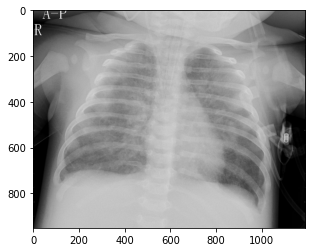

In [20]:
image = cv2.imread(val_path[2])
plt.imshow(image)

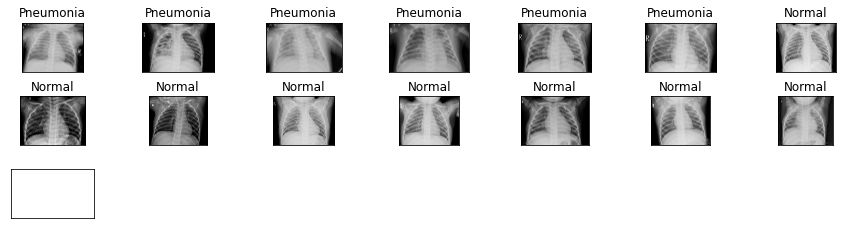

In [23]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(15):
    n += 1 
    image = cv2.imread(val_path[n])
    #image=image/255.
    plt.imshow(image)
    plt.title(val_labels[n])   
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)   
    plt.xticks([]) , plt.yticks([])    
plt.show()

In [24]:
trndata = []
trpdata=[]
vdata = []
width = 150
height = 150
dim = (width, height)

In [30]:
xray_c_path_l=(trpneu_path,trnormal_path,val_path)

for i in xray_c_path_l[0]:    
    image=cv2.imread(i)
    #image = cv2.fromarray(image , 'RGB')
    image= cv2.resize(image,dim)
    trpdata.append(image)     
   

In [31]:

for i in xray_c_path_l[1]:    
    image=cv2.imread(i)
    #image = cv2.fromarray(image , 'RGB')
    image= cv2.resize(image,dim)
    trndata.append(image)     
   

In [32]:
for i in xray_c_path_l[2]:    
    image=cv2.imread(i)
    #image = cv2.fromarray(image , 'RGB')
    image= cv2.resize(image,dim)
    vdata.append(image) 

(16, <matplotlib.image.AxesImage at 0x7ff5d67ad150>)

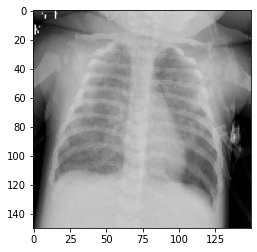

In [33]:
len(vdata),plt.imshow(vdata[2])

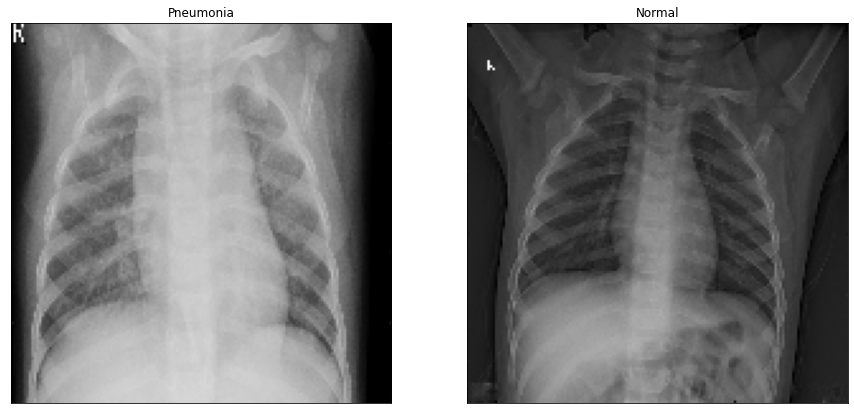

In [34]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(vdata[0])
plt.title(val_labels[0])
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(trndata[0])
plt.title(trnormal_labels[0])
plt.xticks([]) , plt.yticks([])

plt.show()

In [35]:

trndata = np.array(trndata)
trpdata = np.array(trpdata)
vdata = np.array(vdata)


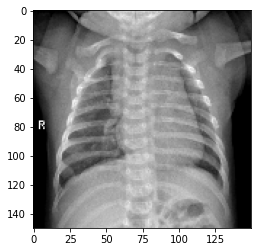

In [36]:
plt.imshow(trndata[2])

In [37]:
train_data=np.concatenate((trndata,trpdata))
train_labels=np.append(trnormal_labels,trpneu_labels)

(<matplotlib.image.AxesImage at 0x7ff5d6714310>, (150, 150, 3), 'Pneumonia')

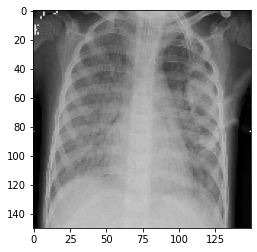

In [39]:
plt.imshow(train_data[1520]),train_data[1520].shape,train_labels[1520]

In [40]:
n = np.arange(train_data.shape[0])
np.random.shuffle(n)
atrain_data = train_data[n]
alabels = train_labels[n]

In [46]:
val_labels[11]

'Normal'

In [55]:
val_labels=np.array(val_labels)

In [56]:
n = np.arange(vdata.shape[0])
np.random.shuffle(n)
aval_data = vdata[n]
avallabels = val_labels[n]

In [59]:
from sklearn import preprocessing

In [60]:
label_encoder = preprocessing.LabelEncoder()
trlabels = label_encoder.fit_transform(alabels)
tvlabels = label_encoder.fit_transform(avallabels)

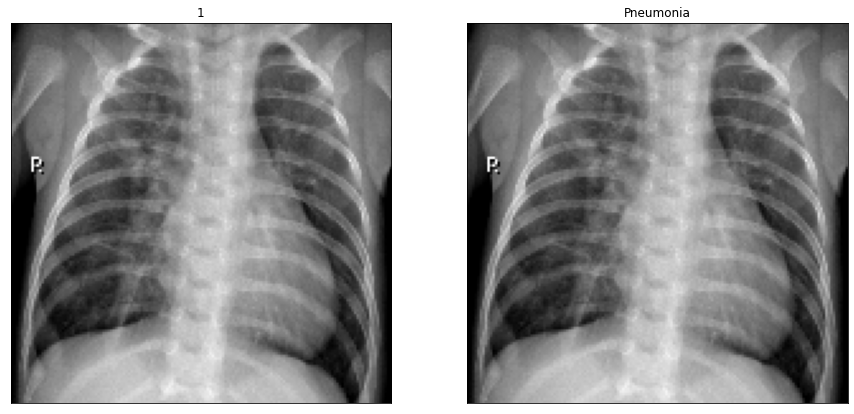

In [67]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(atrain_data[20])
plt.title(trlabels[20])
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(atrain_data[20])
plt.title(alabels[20])
plt.xticks([]) , plt.yticks([])

plt.show()

In [68]:
from sklearn.model_selection import train_test_split

train_x , x_test , train_y , y_test = train_test_split(atrain_data , trlabels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

In [69]:
train_x.shape,x_test.shape,train_y.shape,y_test.shape

((4172, 150, 150, 3), (1044, 150, 150, 3), (4172,), (1044,))

In [70]:
train_y

array([1, 1, 0, ..., 0, 0, 1])

In [71]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

2023-01-20 20:34:22.451542: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 20:34:22.452854: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 20:34:22.612630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 20:34:22.613869: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 20:34:22.615112: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [72]:
history = model.fit(train_x, train_y, batch_size=32,epochs=15,validation_data=(x_test, y_test))

2023-01-20 20:34:48.619130: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2023-01-20 20:34:50.869738: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


131/131 [==============================] - 13s 20ms/step - loss: 9.8979 - accuracy: 0.7294 - val_loss: 0.6701 - val_accuracy: 0.7395
Epoch 2/15
131/131 [==============================] - 2s 13ms/step - loss: 0.6572 - accuracy: 0.7438 - val_loss: 0.6466 - val_accuracy: 0.7395
Epoch 3/15
131/131 [==============================] - 2s 13ms/step - loss: 0.6359 - accuracy: 0.7438 - val_loss: 0.6282 - val_accuracy: 0.7395
Epoch 4/15
131/131 [==============================] - 2s 13ms/step - loss: 0.6192 - accuracy: 0.7438 - val_loss: 0.6141 - val_accuracy: 0.7395
Epoch 5/15
131/131 [==============================] - 2s 13ms/step - loss: 0.6062 - accuracy: 0.7438 - val_loss: 0.6029 - val_accuracy: 0.7395
Epoch 6/15
131/131 [==============================] - 2s 13ms/step - loss: 0.5962 - accuracy: 0.7438 - val_loss: 0.5946 - val_accuracy: 0.7395
Epoch 7/15
131/131 [==============================] - 2s 14ms/step - loss: 0.5888 - accuracy: 0.7438 - val_loss: 0.5885 - val_accuracy: 0.7395
Epoch 8/1

In [73]:
    model = models.Sequential()
    model.add( layers.Conv2D(32, (3,3),  activation= 'relu', input_shape = (150, 150, 3)) )
    model.add(layers.MaxPooling2D((2,2)))

    model.add( layers.Conv2D(64, (3,3),  activation= 'relu') )
    model.add(layers.MaxPooling2D((2,2)))

    model.add( layers.Conv2D(128, (3,3),  activation= 'relu') )
    model.add(layers.MaxPooling2D((2,2)))

    model.add( layers.Conv2D(128, (3,3),  activation= 'relu') )
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation= 'relu'))
    model.add(layers.Dense(1, activation= 'sigmoid'))

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [74]:
history = model.fit(train_x, train_y, batch_size=32,epochs=15,validation_data=(x_test, y_test))

Epoch 1/15
131/131 [==============================] - 5s 28ms/step - loss: 4.8926 - accuracy: 0.8627 - val_loss: 0.3164 - val_accuracy: 0.8429
Epoch 2/15
131/131 [==============================] - 3s 21ms/step - loss: 0.2019 - accuracy: 0.9326 - val_loss: 0.1610 - val_accuracy: 0.9473
Epoch 3/15
131/131 [==============================] - 3s 21ms/step - loss: 0.1631 - accuracy: 0.9384 - val_loss: 0.1352 - val_accuracy: 0.9521
Epoch 4/15
131/131 [==============================] - 3s 22ms/step - loss: 0.1266 - accuracy: 0.9525 - val_loss: 0.1379 - val_accuracy: 0.9550
Epoch 5/15
131/131 [==============================] - 3s 22ms/step - loss: 0.0997 - accuracy: 0.9614 - val_loss: 0.1198 - val_accuracy: 0.9588
Epoch 6/15
131/131 [==============================] - 3s 22ms/step - loss: 0.0840 - accuracy: 0.9662 - val_loss: 0.1118 - val_accuracy: 0.9655
Epoch 7/15
131/131 [==============================] - 3s 22ms/step - loss: 0.0851 - accuracy: 0.9660 - val_loss: 0.2706 - val_accuracy: 0.9100

In [75]:
score = model.evaluate(x_test , y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.12149062007665634
Test accuracy: 0.967432975769043


In [79]:
predictions = model.predict(x_test)

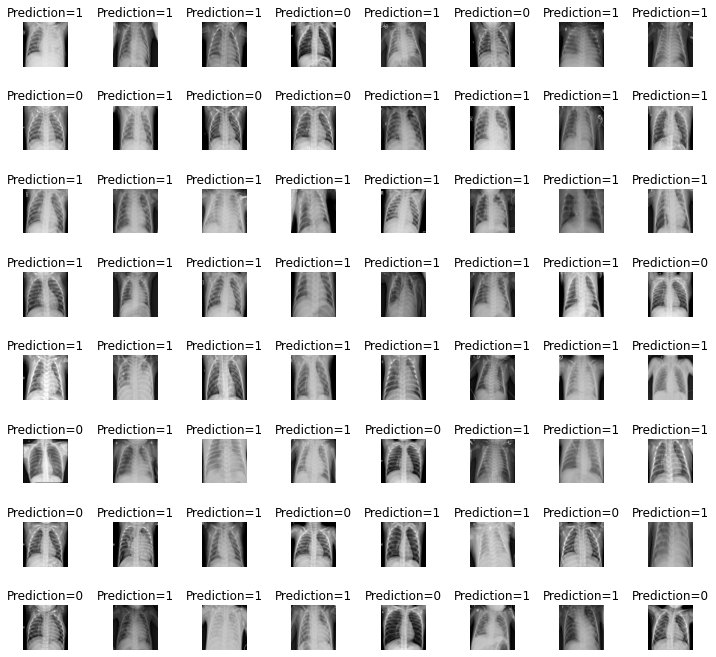

In [81]:
L=8
W=8
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction={}'.format(y_test[i]))
    #axes[i].set_title('Prediction= {}\nTrue={}'.format(predictions[i].argmax(),y_test[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [107]:
test_path = []
test_labels = []

for i in test_normal:
    test_labels.append("Normal")
    print(i)
    test_path.append('/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/'+i)
return test_path, test_labels

NORMAL2-IM-0336-0001.jpeg
IM-0101-0001.jpeg
NORMAL2-IM-0337-0001.jpeg
NORMAL2-IM-0198-0001.jpeg
IM-0013-0001.jpeg
IM-0103-0001.jpeg
NORMAL2-IM-0139-0001.jpeg
NORMAL2-IM-0313-0001.jpeg
NORMAL2-IM-0340-0001.jpeg
NORMAL2-IM-0378-0001.jpeg
IM-0009-0001.jpeg
NORMAL2-IM-0051-0001.jpeg
NORMAL2-IM-0322-0001.jpeg
IM-0091-0001.jpeg
IM-0070-0001.jpeg
NORMAL2-IM-0274-0001.jpeg
IM-0059-0001.jpeg
IM-0067-0001.jpeg
NORMAL2-IM-0210-0001.jpeg
NORMAL2-IM-0073-0001.jpeg
NORMAL2-IM-0290-0001.jpeg
NORMAL2-IM-0135-0001.jpeg
IM-0097-0001.jpeg
NORMAL2-IM-0092-0001.jpeg
NORMAL2-IM-0366-0001.jpeg
IM-0015-0001.jpeg
NORMAL2-IM-0330-0001.jpeg
NORMAL2-IM-0294-0001.jpeg
NORMAL2-IM-0027-0001.jpeg
NORMAL2-IM-0348-0001.jpeg
IM-0041-0001.jpeg
NORMAL2-IM-0237-0001.jpeg
NORMAL2-IM-0282-0001.jpeg
NORMAL2-IM-0259-0001.jpeg
IM-0084-0001.jpeg
NORMAL2-IM-0201-0001.jpeg
NORMAL2-IM-0120-0001.jpeg
NORMAL2-IM-0357-0001.jpeg
NORMAL2-IM-0035-0001.jpeg
NORMAL2-IM-0098-0001.jpeg
NORMAL2-IM-0315-0001.jpeg
NORMAL2-IM-0278-0001.jpeg
NORM

SyntaxError: 'return' outside function (915727941.py, line 8)

In [108]:


for i in test_pnu:
    test_labels.append("Pneumonia")
    print(i)
    test_path.append('/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/'+i)
return test_path, test_labels

person1676_virus_2892.jpeg
person1650_virus_2852.jpeg
person22_virus_55.jpeg
person122_bacteria_582.jpeg
person85_bacteria_417.jpeg
person79_virus_148.jpeg
person29_virus_64.jpeg
person123_bacteria_587.jpeg
person75_virus_136.jpeg
person153_bacteria_725.jpeg
person173_bacteria_831.jpeg
person16_virus_47.jpeg
person138_bacteria_659.jpeg
person112_bacteria_538.jpeg
person83_bacteria_409.jpeg
person23_virus_56.jpeg
person80_bacteria_392.jpeg
person140_bacteria_667.jpeg
person3_virus_17.jpeg
person97_bacteria_468.jpeg
person1_virus_11.jpeg
person83_bacteria_410.jpeg
person127_bacteria_604.jpeg
person121_bacteria_578.jpeg
person1650_virus_2854.jpeg
person21_virus_52.jpeg
person82_bacteria_402.jpeg
person1685_virus_2903.jpeg
person82_bacteria_403.jpeg
person26_virus_60.jpeg
person1663_virus_2876.jpeg
person77_virus_139.jpeg
person1619_virus_2806.jpeg
person136_bacteria_654.jpeg
person157_bacteria_740.jpeg
person19_virus_50.jpeg
person80_bacteria_391.jpeg
person96_bacteria_464.jpeg
person139_

SyntaxError: 'return' outside function (1224027915.py, line 5)

In [109]:
test_labels=np.array(test_labels)

In [110]:
testdata = []


In [111]:
for i in test_path:    
    image=cv2.imread(i)
    #image = cv2.fromarray(image , 'RGB')
    image= cv2.resize(image,dim)
    testdata.append(image)  

(<matplotlib.image.AxesImage at 0x7ff4f248e850>, Text(0.5, 1.0, 'Normal'))

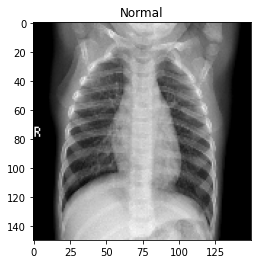

In [112]:
plt.imshow(testdata[2]),plt.title(test_labels[2])

In [113]:
testdata[2].shape

(150, 150, 3)

In [114]:
testdata = np.array(testdata)


In [115]:
n = np.arange(testdata.shape[0])
np.random.shuffle(n)
atest_data = testdata[n]
testlabels = test_labels[n]

In [116]:
np.unique(testlabels)

array(['Normal', 'Pneumonia'], dtype='<U9')

In [117]:
from sklearn.model_selection import train_test_split

train_x , x_test , train_y , y_test = train_test_split(atest_data , testlabels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

In [118]:
train_x.shape,x_test.shape,train_y.shape,y_test.shape

((499, 150, 150, 3), (125, 150, 150, 3), (499,), (125,))

In [119]:
predictions = model.predict(train_x)

In [120]:
predictions

array([[9.9867189e-01],
       [9.5168334e-01],
       [9.9944562e-01],
       [1.0000000e+00],
       [9.9999702e-01],
       [2.7964450e-03],
       [3.9101312e-01],
       [1.0000000e+00],
       [9.8310548e-01],
       [1.0000000e+00],
       [9.9995732e-01],
       [9.9999952e-01],
       [9.9999928e-01],
       [9.9999726e-01],
       [9.7449863e-01],
       [9.7857428e-01],
       [9.9264115e-01],
       [9.9975115e-01],
       [9.9999988e-01],
       [1.0000000e+00],
       [9.2939615e-01],
       [9.9996984e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9513066e-01],
       [9.9890876e-01],
       [1.0000000e+00],
       [9.9983680e-01],
       [9.7716355e-01],
       [9.9820185e-01],
       [1.0000000e+00],
       [9.9642688e-01],
       [7.8651440e-01],
       [9.9999797e-01],
       [9.6775717e-01],
       [9.9998856e-01],
       [9.9840945e-01],
       [6.5630597e-01],
       [9.9999368e-01],
       [1.0000000e+00],
       [9.9999321e-01],
       [1.000000

Real State: Pneumonia


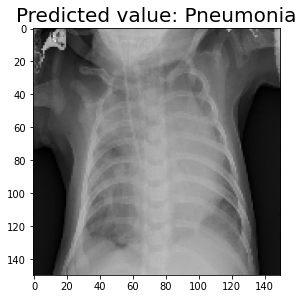

In [137]:

plt.figure(figsize=[10,10])

class_names=('Pneumonia','Normal')

plt.subplot(2,2,1) 
n = 65
plt.imshow(train_x[n].reshape(150, 150, -1), cmap=plt.cm.binary) 
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
print("Real State:",train_y[n])
plt.grid(False)

In [151]:
train_y

array(['Normal', 'Normal', 'Pneumonia', 'Pneumonia', 'Pneumonia',
       'Normal', 'Normal', 'Pneumonia', 'Normal', 'Pneumonia',
       'Pneumonia', 'Pneumonia', 'Normal', 'Pneumonia', 'Normal',
       'Pneumonia', 'Normal', 'Pneumonia', 'Pneumonia', 'Pneumonia',
       'Normal', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Normal',
       'Normal', 'Pneumonia', 'Normal', 'Normal', 'Normal', 'Pneumonia',
       'Normal', 'Normal', 'Pneumonia', 'Normal', 'Pneumonia',
       'Pneumonia', 'Normal', 'Pneumonia', 'Pneumonia', 'Pneumonia',
       'Pneumonia', 'Normal', 'Normal', 'Pneumonia', 'Pneumonia',
       'Pneumonia', 'Pneumonia', 'Normal', 'Pneumonia', 'Pneumonia',
       'Normal', 'Pneumonia', 'Pneumonia', 'Normal', 'Pneumonia',
       'Pneumonia', 'Normal', 'Pneumonia', 'Normal', 'Pneumonia',
       'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia',
       'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Normal',
       'Normal', 'Normal', 'Pneumonia', 'Pneumonia', 'Pne

In [187]:
for a in predictions:
    
    print(int(np.round(a)),a)
 

1 [0.9986719]
1 [0.95168334]
1 [0.9994456]
1 [1.]
1 [0.999997]
0 [0.00279645]
0 [0.39101312]
1 [1.]
1 [0.9831055]
1 [1.]
1 [0.9999573]
1 [0.9999995]
1 [0.9999993]
1 [0.99999726]
1 [0.9744986]
1 [0.9785743]
1 [0.99264115]
1 [0.99975115]
1 [0.9999999]
1 [1.]
1 [0.92939615]
1 [0.99996984]
1 [1.]
1 [1.]
1 [0.99513066]
1 [0.99890876]
1 [1.]
1 [0.9998368]
1 [0.97716355]
1 [0.99820185]
1 [1.]
1 [0.9964269]
1 [0.7865144]
1 [0.999998]
1 [0.96775717]
1 [0.99998856]
1 [0.99840945]
1 [0.65630597]
1 [0.9999937]
1 [1.]
1 [0.9999932]
1 [1.]
1 [0.99998736]
1 [0.9996966]
1 [1.]
1 [0.99999726]
1 [0.9999995]
1 [0.9999268]
0 [0.04470346]
1 [0.99999857]
1 [0.9999925]
1 [0.99742174]
1 [1.]
1 [0.9999981]
1 [0.5271629]
1 [0.999998]
1 [0.9999958]
1 [0.95607674]
1 [1.]
1 [0.999892]
1 [0.9999987]
1 [0.99999845]
1 [0.99996734]
1 [0.99999833]
1 [0.9999994]
1 [0.9999999]
1 [0.999995]
1 [1.]
1 [0.9999999]
1 [1.]
1 [0.8080395]
1 [0.98947793]
1 [0.745385]
1 [0.9469616]
1 [0.9999871]
1 [1.]
1 [0.99999654]
1 [0.9999995]

In [173]:
if train_y[2]=="Normal":
        print('Result is True - Normal')
else: print('False')

False


In [189]:
b=0
for a in predictions:
    b+=1
       
    if int(np.round(a))==0 and str(train_y[b])=="Normal":
        
        print('Result is True - Normal')
        
    elif int(np.round(a))==1 and str(train_y[b])=="Pneumonia":
        
        print('Result is True - Pneumonia')
        
    else: print('Result is False')
    
   
        
            
   
    

Result is False
Result is True - Pneumonia
Result is True - Pneumonia
Result is True - Pneumonia
Result is False
Result is True - Normal
Result is False
Result is False
Result is True - Pneumonia
Result is True - Pneumonia
Result is True - Pneumonia
Result is False
Result is True - Pneumonia
Result is False
Result is True - Pneumonia
Result is False
Result is True - Pneumonia
Result is True - Pneumonia
Result is True - Pneumonia
Result is False
Result is True - Pneumonia
Result is True - Pneumonia
Result is True - Pneumonia
Result is False
Result is False
Result is True - Pneumonia
Result is False
Result is False
Result is False
Result is True - Pneumonia
Result is False
Result is False
Result is True - Pneumonia
Result is False
Result is True - Pneumonia
Result is True - Pneumonia
Result is False
Result is True - Pneumonia
Result is True - Pneumonia
Result is True - Pneumonia
Result is True - Pneumonia
Result is False
Result is False
Result is True - Pneumonia
Result is True - Pneumon

IndexError: index 499 is out of bounds for axis 0 with size 499